<a href="https://colab.research.google.com/github/PANDASANG1231/Deeplearning_byHand/blob/main/036_Image_Augment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
sys.path.append('/content/drive/MyDrive/Colab Notebooks/deeplearning_note')
from tool import *

Mounted at /content/drive


In [ ]:
! nvidia-smi

Mon Jan 24 04:48:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
import torchvision

## Data Augment

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(root="./",train=True,download=True)
test_dataset = torchvision.datasets.CIFAR10(root="./",train=False,download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [ ]:
img_list = [train_dataset[i] for i in range(8)]
lab_list = [x[1] for x in img_list]
img_list = [x[0] for x in img_list]
img_list, lab_list

([<PIL.Image.Image image mode=RGB size=32x32 at 0x7F6946979DD0>,
  <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6946979F50>,
  <PIL.Image.Image image mode=RGB size=32x32 at 0x7F6946979FD0>,
  <PIL.Image.Image image mode=RGB size=32x32 at 0x7F694645D090>,
  <PIL.Image.Image image mode=RGB size=32x32 at 0x7F694645D110>,
  <PIL.Image.Image image mode=RGB size=32x32 at 0x7F694645D1D0>,
  <PIL.Image.Image image mode=RGB size=32x32 at 0x7F694645D250>,
  <PIL.Image.Image image mode=RGB size=32x32 at 0x7F694645D2D0>],
 [6, 9, 9, 4, 1, 1, 2, 7])

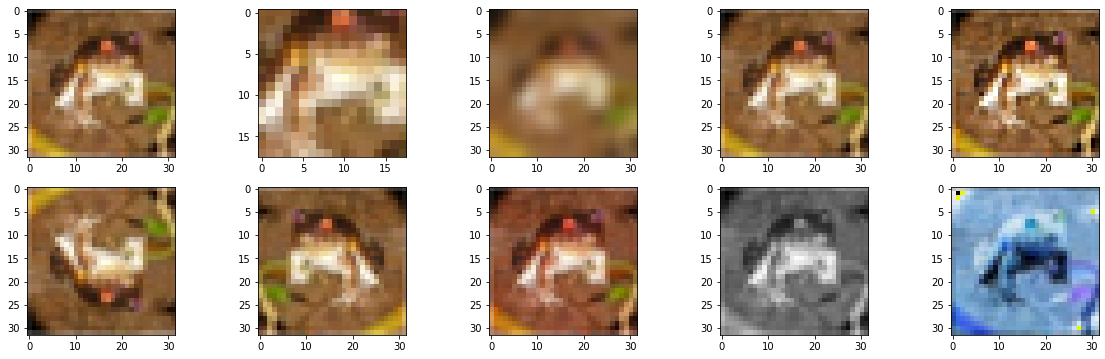

In [ ]:
transform_list = [
    torchvision.transforms.CenterCrop(18),
    torchvision.transforms.GaussianBlur(5),
    torchvision.transforms.RandomAdjustSharpness(0),
    torchvision.transforms.RandomAdjustSharpness(2),
    torchvision.transforms.RandomVerticalFlip(1),
    torchvision.transforms.RandomHorizontalFlip(1),
    torchvision.transforms.ColorJitter(0.1,0.1,0.1,0.1),
    torchvision.transforms.RandomGrayscale(1),
    torchvision.transforms.RandomSolarize(0.5, p=1)
]

fig, axs = plt.subplots(2, 5, figsize=(20, 6))

axs[0][0].imshow(img_list[0])

for aug, ax in zip(transform_list, axs.flatten()[1:]):
    ax.imshow(aug(img_list[0]))


## Resnet + Data Augment


Because of the extra transforms in training data, training process will be slower and training accuracy is lower. But the gap between training and testing is also smaller

In [ ]:
train_aug = torchvision.transforms.Compose([torchvision.transforms.RandomVerticalFlip(0.5), torchvision.transforms.ToTensor()])
test_aug = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

### No augment

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(root="./", train=True, download=True, transform=test_aug)
test_dataset = torchvision.datasets.CIFAR10(root="./", train=False, download=True, transform=test_aug)

train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

resnet = torchvision.models.resnet18(pretrained=False)

device = torch.device('cuda')

train_p2(num_epochs=10, 
         net=resnet,  
         lr=0.03, 
         train_iter=train_dataloader,
         test_iter=test_dataloader,
         device=device,
         optim_type="Adam")

Files already downloaded and verified
Files already downloaded and verified
training on cuda
loss 1.829, train acc 0.354, test acc 0.448
loss 1.319, train acc 0.526, test acc 0.467
loss 1.091, train acc 0.614, test acc 0.562
loss 0.954, train acc 0.666, test acc 0.642
loss 0.850, train acc 0.705, test acc 0.654
loss 0.773, train acc 0.734, test acc 0.575
loss 0.680, train acc 0.766, test acc 0.697
loss 0.614, train acc 0.790, test acc 0.544
loss 0.560, train acc 0.806, test acc 0.733
loss 0.490, train acc 0.834, test acc 0.705
3558.5 examples/sec on cuda


### With Augment

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(root="./", train=True, download=True, transform=train_aug)
test_dataset = torchvision.datasets.CIFAR10(root="./", train=False, download=True, transform=test_aug)

train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

resnet = torchvision.models.resnet18(pretrained=False)

device = torch.device('cuda')

train_p2(num_epochs=10, 
         net=resnet,  
         lr=0.03, 
         train_iter=train_dataloader,
         test_iter=test_dataloader,
         device=device,
         optim_type="Adam")

Files already downloaded and verified
Files already downloaded and verified
training on cuda
loss 1.932, train acc 0.310, test acc 0.244
loss 1.494, train acc 0.449, test acc 0.373
loss 1.303, train acc 0.527, test acc 0.503
loss 1.161, train acc 0.584, test acc 0.480
loss 1.077, train acc 0.619, test acc 0.558
loss 0.998, train acc 0.647, test acc 0.549
loss 0.942, train acc 0.668, test acc 0.618
loss 0.883, train acc 0.692, test acc 0.658
loss 0.834, train acc 0.708, test acc 0.625
loss 0.784, train acc 0.728, test acc 0.667
3555.2 examples/sec on cuda
